# Convolutional Neural Networks

As explained in the [first lecture](./intro.ipynb), the earliest success stories of deep learning are from the field of *computer vision*. In order to use neural networks in the image domain, we need a new architecture that became known under the name of **convolutional neural networks (CNN)**. In fact, CNNs were already successfully employed by [Yann LeCun, Léon Bottou, Yoshua Bengio, Patrick Haffner](https://ieeexplore.ieee.org/abstract/document/726791/) in 1989. They discuss an specific application of CNNs for reading hand-written cheques. Precursors to CNNs go back already to work by [Kunihiko Fukushima](https://link.springer.com/article/10.1007/BF00344251) in 1980.

<img src="images/archs/lenet.jpg" alt="lenet" width="900">

From a mathematical point of view, even single-layer MLP are [universal function approximators](https://link.springer.com/article/10.1007/BF02551274). In other words, in principle  a single-layer MLP with a sufficiently large number of neurons can approximate even highly complicated input-output relations arbitrarily closely. The catch is that these networks become untrainable given today's data and computation power.

One reason for the insufficiency of MLP comes from a computational point of view. Connecting a $512 \times 512$ image  to a single hidden layer consisting of 100 neurons, then this results already in $26,214,400$ weights. For modern machines, this is not yet the death, but it illustrates already the limitations of this naïve approach.

Besides the computational road blocks, there are also more conceptual reasons calling for a different architecture. Essentially, many insights can already be extracted by looking only at a local neighborhood of a pixel. For instance, fto detect edges, we might only need to know the value of a dozen of surrounding pixels, whereas an MLP takes into account possible interactions with pixels in the entire image.

In order to deal with these problems, researchers started to look to biology for inspiration.  In particular, the 1962 [Nobel-prize winning work of the neurophysiologists David Hubel and Torsten Wiesel](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1359523/) on the visual cortex in cats provided the decisive clues. 

Visual information is first processed in the primary visual context. One of the principal insights of Hubel and Wiesel was that the cells in this part of the brain arrange in a planar pattern mimicking the location of incoming signals on the retina. Moreover, we counter two types of cells: **simple cells** and **complex cells**. 

Simple cells exhibit a small receptive field allowing them to process only information originating from a small spatial area. On the other hand, there are also complex cells capturing translation-invariant information, that is, features which are less dependent on the precise location.

It has been observed that most of cells in the primary visual cortex act as [Gabor filters](https://en.wikipedia.org/wiki/Gabor_filter). That is, they detect edges in a particular direction and orientation.

<img id="gab" src="images/gabor.jpg" alt="Gabor filter" width="490" style="display:inline"></img><img id="gabo" src="images/gabor_ocr.png" alt="Gabor filter" width="450" style="display:inline">

## Convolutions

CNNs mimic the functionality of simple cells in the visual cortex. Instead of multiplying the input with a humongous matrix involving information coming from the entire image, CNNs use a certain number of matrices -- called *channels* or *filters* -- that make use only of local information and are then slided over the entire window.

Before writing down this in a [mathematically precise form](https://en.wikipedia.org/wiki/Convolution), this is explained best by a [beautiful animation](./images/convDemo/index.html) from [Andrej Karpathy's course on CNNs](http://cs231n.github.io/convolutional-networks/).

In formulas, the **convolution** $f * k$ of a function $f:\, \{1, \dots, w\} \times \{1, \dots, b\} \to \mathbb R$ with a kernel $k: \{-k_1, \dots, k_1\} \times \{-k_2, \dots, k_2\} \to \mathbb R$ equals
$$(f * k)(z) = \sum_{z' \in \{-k_1, \dots, k_1\} \times \{-k_2, \dots, k_2\}} f(z - z') k(z').$$

### Toy Problem

To see how convolutions enter computer vision, we load an image of digits from the MNIST dataset.

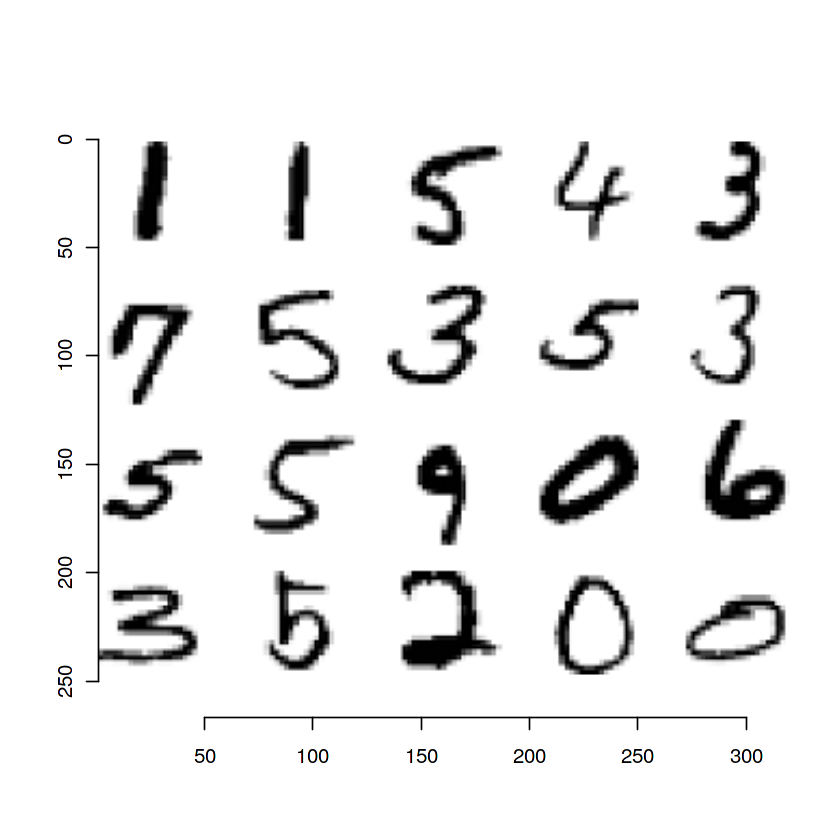

In [3]:
library(imager)
IMAGE_PATH = 'images/mnist.png'

img <- grayscale(load.image(IMAGE_PATH))
plot(img)

With a suitable filter convolutions can detect edges.

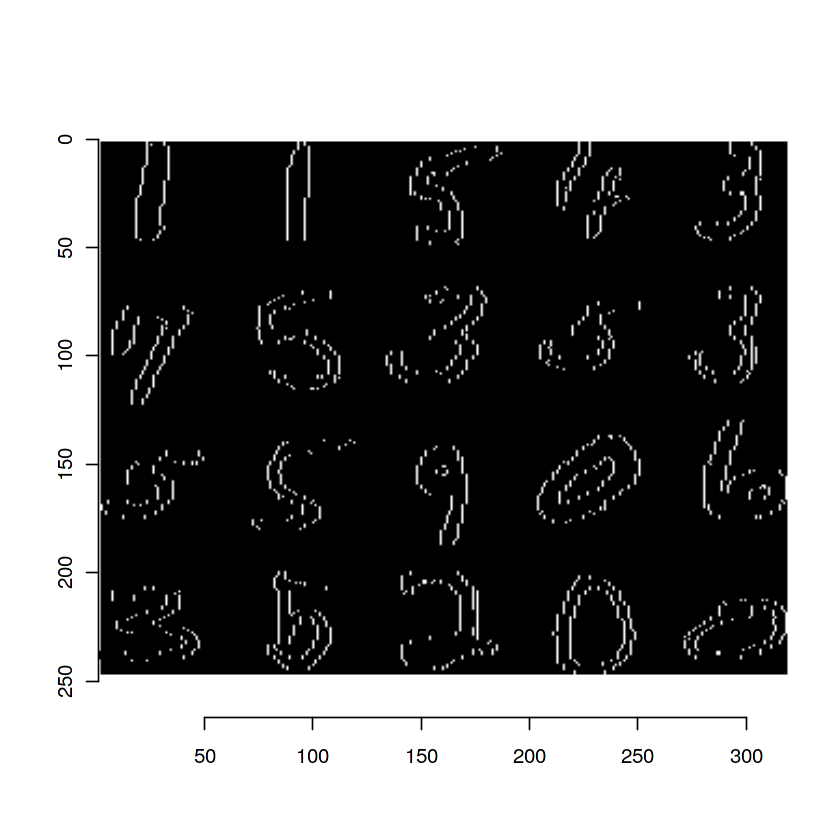

In [4]:
filter<- array(0, dim = c(3, 1, 1, 1))
filter[,1,1,1] <-  matrix(c(-1, 2, -1), nrow = 1)

plot(convolve(img_bin, filter) > 0)

## Max Pooling

As explained above, the convolutional layers are the analogs of simple cells in the primary visual cortex. However, simple cells alone do not suffice for perception as many vision-oriented tasks additionally rely on the recognition of translation-invariant features.

Here, the concept of **Max Pooling** enters the stage. Max pooling downsamples the original image by partitioning it into smaller subregions and only choosing the maximum activation from each subregion. Loosely speaking,  to recognize a cat in an image, it should be critical whether the eyes of the cat are shifted a little to the left or  to the right, as long as they are roughly in the correct position.

<img id="maxp" src="images/maxpool.jpeg" alt="maxpool" width="500">
[cs231n.github.io](https://cs231n.github.io)

## Combining Convolutions and Pooling

A standard CNN is now nothing but a composition of conv and pooling layers. After the final pooling layer, we add one or more dense layers mapping the spatial image data to one of the classes the CNN is designed to distinguish.

<img id="cnn" src="images/karp_cnn.jpeg" alt="Example CNN" width="1500" height="750" style="vertical-align:-200px;">
       [cs231n.github.io](https://cs231n.github.io)



As a rule of thumb, the number of conv layers in a CNN corresponds to the complexity of the computer vision task. For instance, the first convolutional layer typically detects very elementary image characteristics, such as the presence of edges or color gradients.

The following layers capture increasingly complex concepts. For instance, several edges aligned in a good order can form circle. Going further, building on the concept of edges and circles empowers us to detect eyes and then faces in the subsequent layers.

### Classification on MNIST

The *Hello World* of image recognition is the MNIST data set consisting of 60,000 hand-written digits represented as 28x28 binary images. This data set is a popular test-bed for new architectures: even before the advent of deep learning it was possible to recognize digits correctly with over 99% accuracy.

Since classifying digits is relatively easy, a CNN with a small number of layers already achieves good accuracy. Adam Harley provides a beautiful illustration of the CNN concept:
[http://scs.ryerson.ca/~aharley/vis/conv/flat.html](images/conv/flat.html)
         http://scs.ryerson.ca/~aharley/vis/conv/flat.html.

The following network from the  [keras examples](https://github.com/rstudio/keras/blob/master/vignettes/examples/mnist_cnn.R) shows how to weave CNNs into  `keras` models.

In [4]:
library(keras)

model <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu',
                input_shape = c(28, 28, 1)) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_flatten() %>% 
  layer_dense(units = 128, activation = 'relu') %>% 
  layer_dropout(rate = 0.5) %>% 
layer_dense(units = 10, activation = 'softmax')
model

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_3 (Conv2D)                   (None, 26, 26, 32)              320         
________________________________________________________________________________
conv2d_4 (Conv2D)                   (None, 24, 24, 64)              18496       
________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)      (None, 12, 12, 64)              0           
________________________________________________________________________________
dropout_3 (Dropout)                 (None, 12, 12, 64)              0           
________________________________________________________________________________
flatten_2 (Flatten)                 (None, 9216)                    0           
________________________________________________________________________________
dense_2 (Dense)       

### Classification on ImageNet

[ImageNet](http://image-net.org/about-stats) is a substantially more challenging dataset consisting of more than 14 million training images, each assigned to one of 1,000 classes. ImageNet classification is one of the major driving forces behind the success of deep learning, since here CNNs were able to beat previous approaches by a large margin.

Indeed, in 2012 a deep learning architecture under the name of [AlexNet](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks) by Alex Krizhevsky, Ilya Sutskever and Geoffrey Hinton reduced the top-5 error rate from previously 25.8% to 16.4%. In 2014, [VGG 16](https://arxiv.org/abs/1409.1556) by Karen Simonyan and Andrew Zisserman reduced the error to 7.3%. Although, today VGG 16 is not state-of-the-art for the ImageNet challenge any longer, it is still widely used for transfer learning.

VGG 16 consists of 5 blocks of conv layers.

<img src="images/vgg16.png" alt="VGG" width="700px">
https://blog.heuritech.com/2016/03/02/yann-lecun-lectures-at-the-college-de-france-n3/


We can also inspect the Keras representation of VGG16 to see that it consists of 140 million weights!

In [2]:
library(keras)
vgg <- application_vgg16(include_top = T, weights = "imagenet")
vgg

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input_1 (InputLayer)                (None, 224, 224, 3)             0           
________________________________________________________________________________
block1_conv1 (Conv2D)               (None, 224, 224, 64)            1792        
________________________________________________________________________________
block1_conv2 (Conv2D)               (None, 224, 224, 64)            36928       
________________________________________________________________________________
block1_pool (MaxPooling2D)          (None, 112, 112, 64)            0           
________________________________________________________________________________
block2_conv1 (Conv2D)               (None, 112, 112, 128)           73856       
________________________________________________________________________________
block2_conv2 (Conv2D) 

## Fine-Tuning

As deep learning challenges domain-specific elaborate handcrafted solutions, it is often met with skepticism and domain experts try to protect their fiefdoms by putting off deep learning as a fad.

One commonly held belief is that due to the humongous number of weights, deep nets are only effective for very particular problems like ImageNet featuring a large amount of training data.

Although it is true that training a modern deep network from scratch requires a substantial amount of training data, it is often possible to reuse nets trained on related tasks. This is known as **transfer learning**.

We explain this concept by following the excellent ``keras``-tutorial by François Chollet https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html. The task is to train a classifier in order to distinguish cats form dogs. Since the 1000 categories of ImageNet also contain several different breeds of dogs and cats, a network trained on imagenet should be highly valuable for the present task as well.

### VGG as Feature Extractor

The simplest approach to transfer learning is to take a battle-hardened architecture such as VGG16 and use it as a *feature extractor*. More precisely, we remove the dense layers and consider the output of the remaining network as features describing relevant characteristics of the image.

As initial step, we define the truncated network.

In [7]:
vgg16 <- application_vgg16(include_top = F, weights = "imagenet")

Next, we create a data generator, so that we can retrieve the images from memory and send them through the network. To accelerate training, we only consider training and validation sets consisting of 1000 cats and 1000 dogs each.

In [8]:
gen_train <- flow_images_from_directory('../notebooks/data/train_small',
                            generator = image_data_generator(rescale = 1. / 255) ,
                            target_size = list(150, 150),
                            batch_size = 10,
                            class_mode=NULL,  
                            shuffle=F)

Now, we extract the features and save them to disk.

In [12]:
batch_size <- 10

features <- vgg16 %>%
 predict_generator(generator = gen_train, 
                   steps = 2000 / batch_size)

saveRDS(features, file = "../notebooks/data/features.RData")

We can restore the features at any later point:

In [13]:
features <- readRDS("../notebooks/data/features.RData")

Transfer learning rests on the idea that extracted features are so powerful, that now an MLP with one hidden layer suffices to tell cats from dogs.

In [14]:
model <- keras_model_sequential() %>%
 layer_flatten(input_shape = dim(features)[-1]) %>%
 layer_dense(256, activation = 'relu') %>%
 layer_dropout(.5) %>%
 layer_dense(1, activation = 'sigmoid')

model %>%
 compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = 'accuracy')
model

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_1 (Flatten)                 (None, 8192)                    0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 256)                     2097408     
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 256)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 1)                       257         
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
________________________________________________________________________________



Since we only need to train a single-layer MLP the training of the top network is lightning fast and the training error decreases.

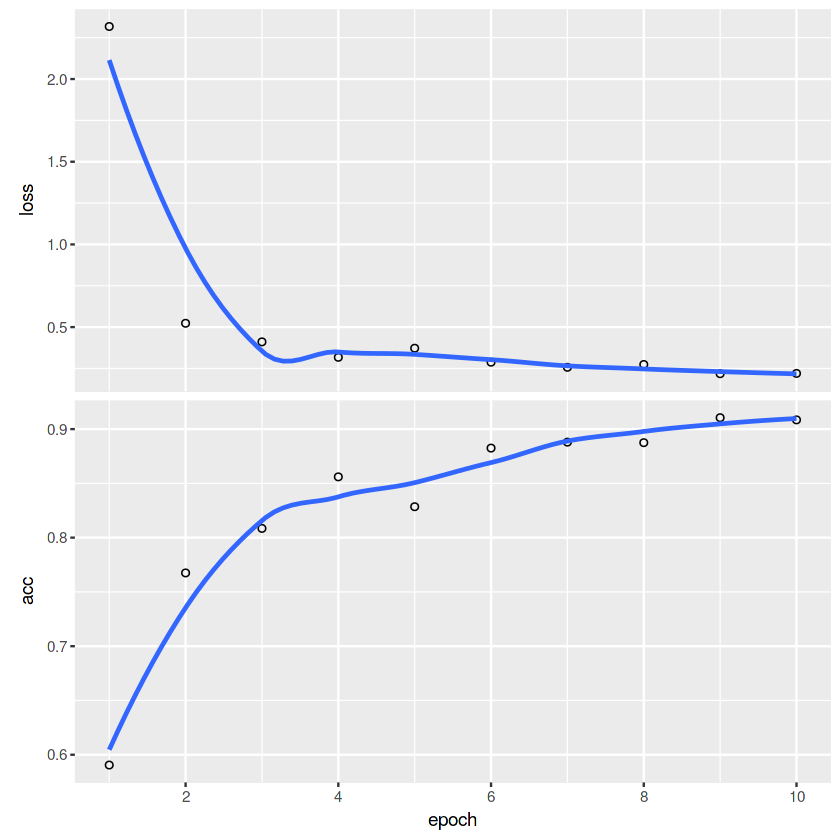

In [15]:
train_size <- 2000

hist <- model %>%
         fit(x = features, 
             y = c(rep(0, train_size/2), 
                   rep(1, train_size/2)),
              epochs=10,
              batch_size = 128)

plot(hist)

We store the model weights on disk, so that we can reuse them later.

In [19]:
save_model_weights_hdf5(model, "data/bottleneck_fc_model.h5")

### Retraining of Final Layers

Although fitting an MLP on VGG16 features already provides good results, the idea of transfer learning can be refined further. Indeed, one downside of the feature-extraction approach is that data augmentation becomes cumbersome. Moreover, although we do not have an incentive to change the early layers of VGG, it might make sense to allow the later convolution layers be problem-dependent. The reason for this is that the early layers perform basic geometric tasks such as recognizing edges, whereas higher layers capture more abstract concepts.

First, we augment the training data via a generator.

In [16]:
gen_train <- flow_images_from_directory('data/train_small',
                            generator = image_data_generator(rescale = 1. / 255,
                                        shear_range = .2,
                                        zoom_range = .2,
                                        horizontal_flip = T) ,
                            target_size = list(150, 150),
                            batch_size = 10,
                            class_mode = 'binary')

Second, we customize the top of VGG16 and only allow the highermost layers to be influenced by the model fitting. 

In [18]:
vgg_model <- application_vgg16(include_top = F, 
                               weights = "imagenet", 
                               input_shape = c(150, 150, 3))
    
top_model <- keras_model_sequential() %>%
 layer_flatten(input_shape = dim(features)[-1]) %>%
 layer_dense(256, activation = 'relu') %>%
 layer_dropout(.5) %>%
 layer_dense(1, activation = 'sigmoid')

Now, we load the weights from the previous fitting and define the combined model.

In [19]:
top_model %>%
    load_model_weights_hdf5("data/bottleneck_fc_model.h5")

model <- keras_model(inputs= vgg_model$input, outputs= top_model(vgg_model$output))
model

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input_2 (InputLayer)                (None, 150, 150, 3)             0           
________________________________________________________________________________
block1_conv1 (Conv2D)               (None, 150, 150, 64)            1792        
________________________________________________________________________________
block1_conv2 (Conv2D)               (None, 150, 150, 64)            36928       
________________________________________________________________________________
block1_pool (MaxPooling2D)          (None, 75, 75, 64)              0           
________________________________________________________________________________
block2_conv1 (Conv2D)               (None, 75, 75, 128)             73856       
________________________________________________________________________________
block2_conv2 (Conv2D) 

We now disable training of the early layers. 

In [20]:
for(layer in model$layers[1:15])
    layer$trainable <- F

model%>%
    compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = 'accuracy')

Now, we train the enhanced model.

In [22]:
train_size <- 2000 / 10

hist <- model %>%
         fit_generator(gen_train,
                steps_per_epoch = train_size,
                epochs = 10)

plot(hist)

Unfortunately, in this example allowing more layers to be retrained did not result in an improvement of the error. However, there are several further steps we could try to improve the performance:
1. Train on more data
2. Increase data augmentation
3. Increase regularization, e.g. by inserting batch normalization

## Architectures

Although CNNs have already appeared in the 1980s, the way in which different layers are composed to solve computer vision tasks has changed dramatically over the years. Following a highly informative [blog post](https://www.jeremyjordan.me/convnet-architectures/) by Jeremy Jordan, we briefly review the history from the dawn of time to the modern era.

### LeNet


**LeNet** can be seen as the fundamental basis for CNNs and was proposed by [Yann LeCun, Léon Bottou, Yoshua Bengio, Patrick Haffner](https://ieeexplore.ieee.org/abstract/document/726791/) in 1998. Although it contains only 2 convolutional layers, this network achieves impressive performance for reading handwritten cheques.

<img  src="images/archs/lenet.jpg" alt="LeNet" width="900">

### AlexNet

In 2012, Alex Krizhevsky, Geoffrey Hinton, and Ilya Sutskever caused the *big bang* for deep learning by winning the ILSCVR 2012 competition by a large margin with their network **AlexNet**.

<img id="gab" src="images/archs/ilsvrc.png"  alt="alexnet" width="700">
https://medium.com/@sidereal/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5

Winning the ILSCVR 2012 competition on classifying $224 \times 224$ images required a far more elaborate architecture than the one used for LeNet. In particular, AlexNet contains five convolutional layers. 



<img src="images/archs/aleyNet.png" alt="alexnet" width="900">
https://www.jeremyjordan.me/convnet-architectures/

### VGG 16

In 2014, **VGG 16** developed by [Karen Simonyan & Andrew Zisserman](https://arxiv.org/abs/1409.1556) reduced the Top 5-error to 7.3%. In comparison to AlexNet, VGG 16 goes far deeper, now moving from 5 to 13 convolutional layers. 

<img src="images/vgg16.png" alt="vgg16" width="700px">
https://blog.heuritech.com/2016/03/02/yann-lecun-lectures-at-the-college-de-france-n3/


Today, VGG 16 is still used as feature extractor and for the purpose of transfer learning.

### Inception

In 2015, **GoogleNet** developed by [Christian Szegedy, Wei Liu, Yangqing Jia, Pierre Sermanet, Scott Reed, Dragomir Anguelov, Dumitru Erhan, Vincent Vanhoucke & Andrew Rabinovich](https://arxiv.org/abs/1409.4842) further reduced the error on ImageNet to 6.7%.  It features a total of 22 layers.

<img id="gab" src="images/archs/GoogleNet.png" alt="inception" width="900">
https://www.jeremyjordan.me/convnet-architectures/

Additionally, the [paper](https://arxiv.org/abs/1409.4842) introduces the **inception module** as a crucial new architecture component. Instead of fixing the kernel size $3 \times 3$, the idea is to consider also $5 \times 5$ and $7 \times 7$ filters, and then let the network learn what filter sizes work best. The issue is that if implemented naïvely, this idea leads to a quick computational death.

The inception module solves this problem by relying on $1 \times 1$ convolutions to reduce the channel numbers. On the reduced channel space, convolutions with varying kernel sizes can be carried out efficiently.

<img src="images/archs/inception.jpg"  alt="inception module" width="900">

We can understand this by a quick back-of-the envelope calculation. Suppose, we use $5 \times 5$ kernels to go from $192$ channels to $32$ channels. This involves 
$$5^2 \cdot 192 \cdot 32 = 153,600$$ 
weights. On the other hand, suppose we first apply $1 \times 1$ convolutions to go from $192$ to $16$ channels and then $5 \times 5$ convolutions to go from $16$ to $32$ channels. Then, the total number of weights reduces to
$$ 192 \cdot 16 + 5^2 \cdot 16 \cdot 32= 15,872.$$

### ResNet

**ResNet** was developed by [Kaiming He, Xiangyu Zhang, Shaoqing Ren & Jian Sun](https://arxiv.org/abs/1512.03385) and won the ILSCVR 2015 competition with an error of 3.57%. By now, we have understood that the number of layers is the name of the game in image recognition and ResNet epitomizes this law by relying on 152 layers.

Scaling the number of components into this regime is only possible due to a new architectural component called **skip connections**. The idea behind skip connections is to change the parametrization so as to encode how much a function differs from the identity.

<img src="images/archs/resnet1.jpg" alt="resnet" width="500">

### DenseNet

We turn now to the final CNN model: **DenseNet**, developed in 2016 by [Gao Huang, Zhuang Liu, Laurens van der Maaten & Kilian Q. Weinberger](https://arxiv.org/abs/1608.06993). The idea behind DenseNet is that often feature maps from early layers can also provide valuable information for later layers. Therefore, the output of earlier layers is copied to the input of later layers.

<img src="images/archs/denseNet1.png"  alt="densenet" width="700">
https://www.jeremyjordan.me/convnet-architectures/

Clearly, this concatenation of feature maps leads to a rapid growth in the number of weights. In **DenseNet**, this growth is controlled by using only of the order of 12 channels. 

<img src="images/archs/denseNet2.png" alt="densenet"  width="900">
https://www.jeremyjordan.me/convnet-architectures/